In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import collections

from genome import Genome
from visualize import Visualize

from IPython.display import Image

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float)
Y = np.array([[0],[1],[1],[0]], dtype=np.float) 
data = X,Y

In [3]:
g = Genome(data)
GENOME = g.create()
for _ in range(10):
    GENOME = g.mutate(GENOME)

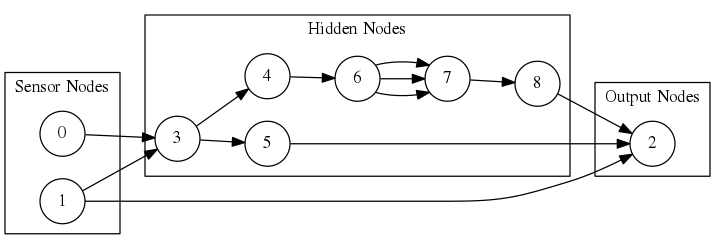

In [4]:
v = Visualize(GENOME)
Image(v.create(simple=True))

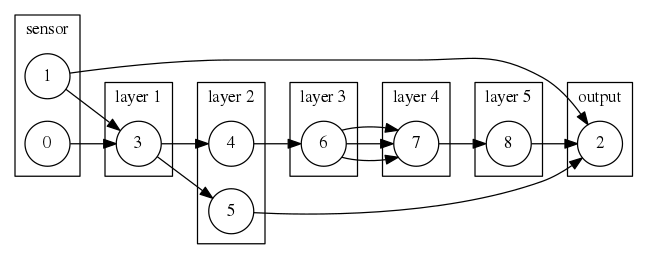

In [5]:
v = Visualize(GENOME)
Image(v.create(simple=False))

In [6]:
class Phenome(object):
    '''
    A Neural Network Constructor
    - Accepts a Genome as input
    - Parses values and weights into an execution order
    - Returns an operation to be executed in the Fitness class
    '''

    def __init__(self, aGenome):
        # Store the aGenome tuple in DataFrame objects
        self.nodes,self.connections = aGenome
        # Only use enabled connection genes
        self.connections = self.connections.loc[self.connections['enabled'] == True]
    
    def create(self):
        ## Build layer execution order
        # An ordered dictionary to hold layer node mappings
        layerDict = collections.OrderedDict()
        # Create a list of all the layers in the nodes DataFrame
        layerList = sorted(self.nodes.layer.unique().tolist())
        # Use the list to create 
        for ix,ele in enumerate(layerList):
            # Select the nodes in layer ele as a list
            layerN = self.nodes.loc[self.nodes.layer == ele,("node")].values.tolist()
            # Add the nodes to the layer dictionary
            #if layerList[0] == ix:
            #    layerDict['sensor'] = layerN
            #elif layerList[-1] == ix:
            #    layerDict['output'] = layerN
            #else:
            layerDict[ele] = layerN
        ## Sort layers and nodes in 'reverse' layer order: output, layerN[-1], layerN[-2], ..., sensor
        layerDict = collections.OrderedDict(reversed(list(layerDict.items())))
        
        return layerDict


In [7]:
nodes,connections = GENOME
connections = connections.loc[connections.enabled == True]

In [8]:
p = Phenome(GENOME)
layerDict = p.create()
layerDict

OrderedDict([(6, [2]),
             (5, [8]),
             (4, [7]),
             (3, [6]),
             (2, [4, 5]),
             (1, [3]),
             (0, [0, 1])])

In [9]:
## Build the weight dictionary
# Create an ordered dictionary to store the weight values
aPhenome = collections.OrderedDict()
for k,v in layerDict.items():
    # How many nodes target layer k's nodes?
    inNodes = connections.loc[connections['out'] == k]['in'].values.tolist()
    # What are the weights of these connections?
    weights = connections.loc[connections['in'].isin(inNodes)]['weight'].values
    # Store the weights in an ordered dictionary
    aPhenome[k] = weights
aPhenome

OrderedDict([(6, array([1.])),
             (5, array([1.        , 0.17420221])),
             (4, array([1.        , 0.17420221])),
             (3, array([ 0.9432222 ,  0.23931465, -0.59667831])),
             (2, array([ 0.9432222 ,  1.        , -0.59667831,  1.        ])),
             (1, array([], dtype=float64)),
             (0, array([], dtype=float64))])

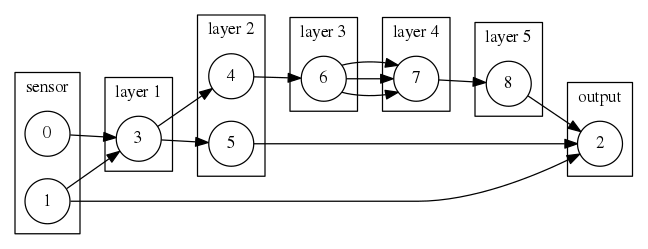

In [10]:
v = Visualize(GENOME)
Image(v.create(simple=False))

In [11]:
connections.sort_values(by=("in"))

,in,out,weight,enabled,innovation
2,0,3,0.239315,True,6
1,1,2,0.943222,True,4
9,1,3,-0.596678,True,15
5,3,4,1.000000,True,10
7,3,5,0.174202,True,13
10,4,6,1.000000,True,17
8,5,2,1.000000,True,14
12,6,7,1.000000,True,20
14,6,7,0.635754,True,22
15,6,7,-0.042976,True,23
